# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [13]:
import numpy as np

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [14]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 100
n_out = 10

# Nb de 'training examples'
m = 300

In [15]:
alpha = 0.1  # Learning rate
epochs = 500  # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.tanh(x)

## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [18]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []
    
    for epoch in range(epochs):
        # Forward
        Z1 = np.add(np.dot(W1, X), b1)
        A1 = np.tanh(Z1)
        Z2 = np.add(np.dot(W2, A1), b2)
        A2 = sigmoid(Z2)
        
        # Backward
        dZ2 = A2 - Y
        dW2 = (1 / X.shape[1]) * np.dot(dZ2, A1.T)
        db2 = (1 / X.shape[1]) * np.sum(dZ2, axis = 1, keepdims=True)
        
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1 / X.shape[1]) * np.dot(dZ1, X.T)
        db1 = (1 / X.shape[1]) * np.sum(dZ1, axis = 1, keepdims=True)    

        # Parameter update (use the learning rate alpha here!)
        W1 -= alpha * dW1
        W2 -= alpha * dW2
        b1 -= alpha * db1
        b2 -= alpha * db2
       
    
        # Compute loss
        loss = np.mean(-np.add(np.multiply(Y,np.log(A2)),
            np.multiply(np.subtract(1, Y),np.log(np.subtract(1, A2)))))
        
        
        loss_history.append(loss)
        print("Epoch %d, Loss: %.8f" % (epoch, loss))
    
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [19]:
W1 = np.random.randn(n_hidden, n_in) * 1
W2 = np.random.randn(n_out, n_hidden) * 1
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [20]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
print(X.shape[1])
Y = X ^ 1

300


## Lancer l'entraînement du réseau

In [21]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

Epoch 0, Loss: 3.29748794
Epoch 1, Loss: 2.25929391
Epoch 2, Loss: 1.74787036
Epoch 3, Loss: 1.38598872
Epoch 4, Loss: 1.09995564
Epoch 5, Loss: 0.88154490
Epoch 6, Loss: 0.71705355
Epoch 7, Loss: 0.59617900
Epoch 8, Loss: 0.50525781
Epoch 9, Loss: 0.43732201
Epoch 10, Loss: 0.38396912
Epoch 11, Loss: 0.34198902
Epoch 12, Loss: 0.30741057
Epoch 13, Loss: 0.27895606
Epoch 14, Loss: 0.25482030
Epoch 15, Loss: 0.23432941
Epoch 16, Loss: 0.21661360
Epoch 17, Loss: 0.20123639
Epoch 18, Loss: 0.18774228
Epoch 19, Loss: 0.17583881
Epoch 20, Loss: 0.16526487
Epoch 21, Loss: 0.15582497
Epoch 22, Loss: 0.14735464
Epoch 23, Loss: 0.13972086
Epoch 24, Loss: 0.13281236
Epoch 25, Loss: 0.12653622
Epoch 26, Loss: 0.12081406
Epoch 27, Loss: 0.11557948
Epoch 28, Loss: 0.11077592
Epoch 29, Loss: 0.10635500
Epoch 30, Loss: 0.10227509
Epoch 31, Loss: 0.09850028
Epoch 32, Loss: 0.09499937
Epoch 33, Loss: 0.09174521
Epoch 34, Loss: 0.08871403
Epoch 35, Loss: 0.08588497
Epoch 36, Loss: 0.08323962
Epoch 37, L

Epoch 297, Loss: 0.01407342
Epoch 298, Loss: 0.01403565
Epoch 299, Loss: 0.01399827
Epoch 300, Loss: 0.01396126
Epoch 301, Loss: 0.01392462
Epoch 302, Loss: 0.01388835
Epoch 303, Loss: 0.01385245
Epoch 304, Loss: 0.01381691
Epoch 305, Loss: 0.01378173
Epoch 306, Loss: 0.01374691
Epoch 307, Loss: 0.01371244
Epoch 308, Loss: 0.01367833
Epoch 309, Loss: 0.01364457
Epoch 310, Loss: 0.01361115
Epoch 311, Loss: 0.01357808
Epoch 312, Loss: 0.01354535
Epoch 313, Loss: 0.01351295
Epoch 314, Loss: 0.01348089
Epoch 315, Loss: 0.01344917
Epoch 316, Loss: 0.01341776
Epoch 317, Loss: 0.01338669
Epoch 318, Loss: 0.01335593
Epoch 319, Loss: 0.01332550
Epoch 320, Loss: 0.01329537
Epoch 321, Loss: 0.01326556
Epoch 322, Loss: 0.01323605
Epoch 323, Loss: 0.01320685
Epoch 324, Loss: 0.01317795
Epoch 325, Loss: 0.01314934
Epoch 326, Loss: 0.01312103
Epoch 327, Loss: 0.01309300
Epoch 328, Loss: 0.01306526
Epoch 329, Loss: 0.01303780
Epoch 330, Loss: 0.01301062
Epoch 331, Loss: 0.01298370
Epoch 332, Loss: 0.0

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

0.010041717564854172

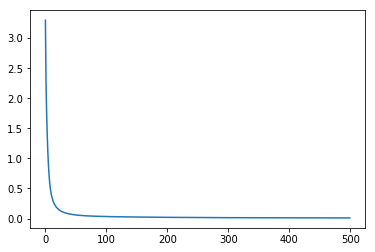

In [22]:
%matplotlib inline  
from matplotlib import pyplot as plt

plt.plot(loss_history)
loss_history[-1]

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [40]:
def predict(X, W1, W2, b1, b2):
        Z1 = np.add(np.dot(W1, X), b1)
        A1 = np.tanh(Z1)
        Z2 = np.add(np.dot(W2, A1), b2)
        A2 = sigmoid(Z2)
        return (np.array([0 if res < 0.5 else 1 for res in A2]))

### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [65]:

X = np.random.binomial(1, 0.5, (n_in,1))
print("X     =", X.T)
print("Y     =", (X ^ 1).T)
print("Ypred =", predict(X, W1, W2, b1, b2).T)

X     = [[0 0 1 1 1 0 0 0 0 1]]
Y     = [[1 1 0 0 0 1 1 1 1 0]]
Ypred = [1 1 0 0 0 1 1 1 1 0]


### Tester la performance sur une série d'exemples

In [66]:
from sklearn.metrics import roc_auc_score

val_list = list()
for _ in range (100) :
    X = np.random.binomial(1, 0.5, (n_in, 1))
    Y = (X ^ 1).T
    val_list.append(roc_auc_score(Y.T, predict(X, W1, W2, b1, b2)))
    
print(val_list)
print(np.mean(val_list))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91666666666666674, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.999166666667
